# <font color = 'teal'> АНАЛИЗ A/B-ТЕСТА

<div class = "alert alert-info" style = "border-color: info; border-radius: 10px"> 
    <font color = 'black'>
В компании крупного интернет-магазина отдел маркетинга и аналитики подготовили список гипотез для увеличения выручки. 

        
   **Задачи — приоритизировать составленные гипотезы, запустить A/B-тест и проанализировать результаты.**

<div class = "alert alert-info" style = "border-color: info; border-radius: 10px"> 
    <font color = 'black'>

### Общий план работы
        
**Часть 1. Приоретизация гипотез**

- Применение фреймворка ICE
- Применение фреймворка RICE 
- Анализ изменения приоритизации гипотез при применении RICE вместо ICE
        
**Часть 2. Анализ A/B-теста**       
- График кумулятивной выручки по группам
- График кумулятивного среднего чека по группам
- График относительного изменения кумулятивного среднего чека группы B к группе А 
- График кумулятивного среднего количества заказов на посетителя по группам
- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- Точечный график количества заказов по пользователям
- 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей
- Точечный график стоимостей заказов
- 95-й и 99-й перцентили стоимости заказов. Выбор границу для определения аномальных заказов
- Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
- Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
- Решение по результатам теста (варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест)

## Приоретизация гипотез

### Применение фреймворка ICE

Для начала хотелось бы просто посмотреть на имеющиеся у нас данные, чтобы потом понимать, с чем работать. Поэтому посмотрим на таблицу с гипотезами.

In [1]:
# Выгружаем нужные нам библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Значения названий столбцов:
- Hypothesis - наименование гипотезы
- Reach — скольких пользователей затронет изменение, которое мы внесем;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

По таблице стало ясно, что у нас есть девять гипотез и проставлены все необходимые оценки для применения наших фреймворков. Но лучше изменить названия столбцов, чтобы не было заглавных букв.

In [2]:
# Приводим названия столбцов к нужному виду и проверям
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [3]:
# Расширим столбец hypothesis, чтобы стало видно полные названия гипотез
pd.options.display.max_colwidth = 1
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 Теперь мы можем спокойно применить метод ICE для приоритизации.

In [4]:
# Высчитываем ICE через impact, confidence и efforts
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
display(round((data.sort_values(by = 'ICE', ascending = False)[['hypothesis', 'ICE']]), 1))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Судя по всему самыми перспективными являются гипотезы под индексом 8, 0 и 7.
- индекс 8 - "Запустить акцию, дающую скидку на товар в день рождения"
- индекс 0 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" 
- индекс 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 

А самыми незначительными для дальнейшего теста стали гипотезы с индексами 5, 3 и 4. 
- индекс 5 - "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
- индекс 3 - "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
- индекс 4 - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"

Теперь применим фреймворк RICE для полной оценки.

### Применение фреймворка RICE 

In [5]:
# Вычисляем RICE с добавлением значений оценки reach к ICE 
data['RICE'] = (data['impact'] * data['confidence'] * data['reach']) / data['efforts']
display(round((data.sort_values(by = 'RICE', ascending = False)[['hypothesis', 'RICE']]), 1))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самыми перпективными в данном случае стали гипотезы с индексами 7, 2 и 0, а самыми незначительными под индексами 1, 5 и 4.

### Анализ изменения приоритизации гипотез при применении RICE вместо ICE

По RICE самыми перспективными на этот раз оказались те же гипотезы с индексом 7 и 0, однако на втором месте теперь гипотеза под индексом 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"), когда как гипотеза с индексом 8, которая была первая в списке по ICE приоритизации, оказалась аж на пятом месте, где стояла гипотеза под индексом 2. Это объясняется тем, что у второй гипотезы reach был оценен намного выше, чем у восьмой (8 против 1). Значит, изменения при положительном результате гипотезе 2 затронет намного большее количество пользователей интернет-магазина, чем восьмая гипотеза. Судя по оценке reach гипотеза 8 затронет совсем незначительное число пользователей. Возможно стоило бы проверить первые пять гипотез, учитывая еще то, что RICE для 0 и 6 гипотез (которые находятся на 3 и 4 месте соответственно) одинаково при округлении. Но абсолютными лидерами по приоритизации ICE и RICE являются гипотезы 7 и 0, так как они находятся в первой тройке при применении каждого метода. 

## Анализ A/B-теста

Судя по заданию, A/B-тест уже был проведен, и результаты находятся в двух датасетах. Нам нужно лишь проанализировать их. Вызовем эти две таблицы для первоначального изучения.

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В целом все кажется с данными хорошо. Однако надо проверить тип данных, особенно волнует дата, так как скорее всего ее нужно преобразовать. 

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Да, дата в обоих таблицах имеет неподходящий тип данных для нашего дальнейшего анализа. Поэтому изменим его на нужный.

In [11]:
# Меняем тип данных в столбцах с датой в каждой таблице, применяя нужный формат даты (на всякий случай)
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
# Выводим получившийся тип данных
print(
    orders['date'].dtype,
    visitors['date'].dtype
)

datetime64[ns] datetime64[ns]


In [13]:
# Проверим данные на наличие пропусков
print(
    orders.isna().sum(),
    visitors.isna().sum()
)

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64 date        0
group       0
visitors    0
dtype: int64


In [14]:
# Проверим данные на наличие дубликатов
print(
    orders.duplicated().sum(),
    visitors.duplicated().sum()
)    

0 0


<div class="alert alert-block alert-info">
<b> </b> Нам очень повезло, пропусков и дубликатов не обнаружено. 
</div>

In [15]:
# Проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах А и В.
len(orders[orders['group'].isin(['А', 'В'])].groupby('visitorId').filter(lambda x: len(x) > 1))

0

<div class="alert alert-block alert-info">
<b> </b> Таких пользвоателей нет. Нам снова очень повезло, и теперь мы точно можем приступать к анализу.
</div>

In [16]:
# Найдем количество пользователей, которые случайно попали в обе группы
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [17]:
# Удалим их из общей таблицы (так как они будут искажать результаты)
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()
orders = orders.query('visitorId not in @double_users')

In [18]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    0
dtype: int64

### График кумулятивной выручки по группам

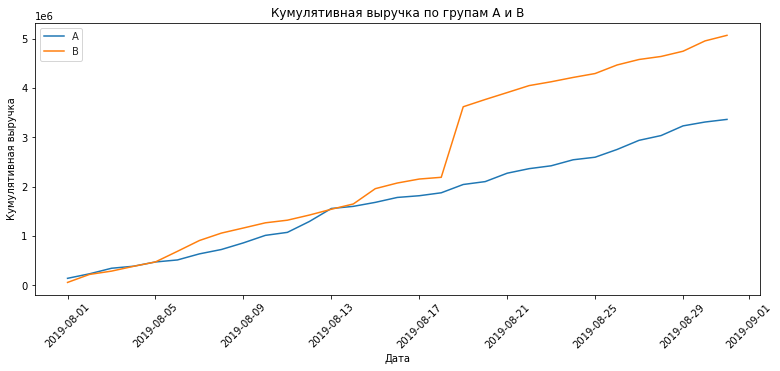

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# Строим график кумулятивной выручки по группам
plt.figure(figsize = (13, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
sb.set_style("white")
sb.set_palette("husl")

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по групам A и B')

plt.show(); 

На графике мы видим, что кумулятивная выручка растет у обеих групп6 однако практически все время лидировал сегмент В. Особенно резкий случился рост около 18 августа, скорее всего там вылезли аномалии.  

### График кумулятивного среднего чека по группам

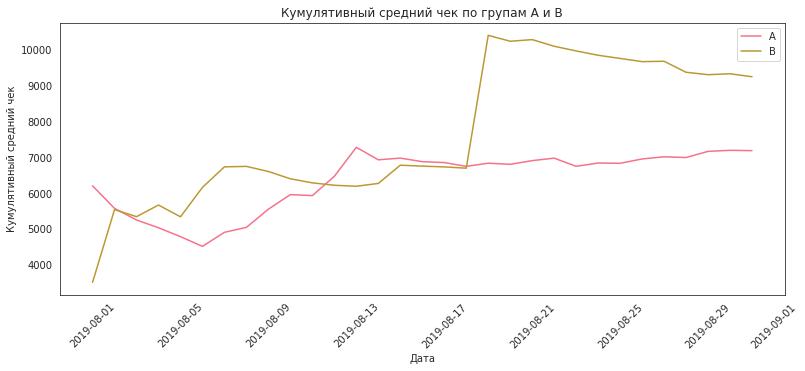

In [20]:
# строим гарфик
plt.figure(figsize = (13, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по групам A и B')

plt.show(); 

Данные по среднему чеку сильно колеблятся, стал более заметен выброс у сегмента В. Поэтому окончательный вывод мы сможем сделать только после работы над соркащением аномалий. 

### График относительного изменения кумулятивного среднего чека группы B к группе А

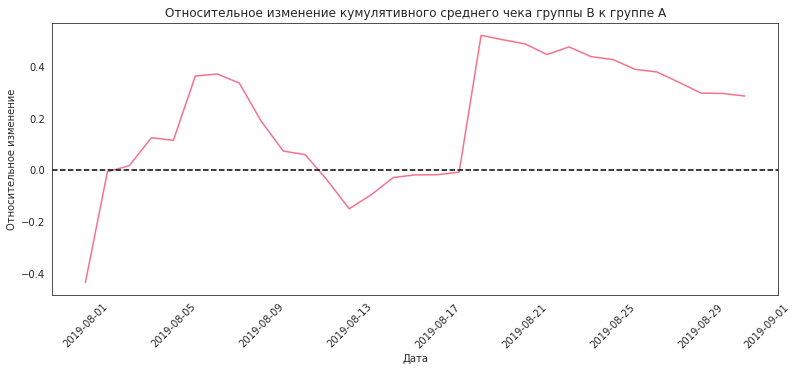

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize = (13, 5)) 
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')

plt.show();

График относительного изменения по среднему чеку только подтвердили наши догадки по аномалиям. Стоит точно будет проработать этот момент далее. 

### График кумулятивного среднего количества заказов на посетителя по группам

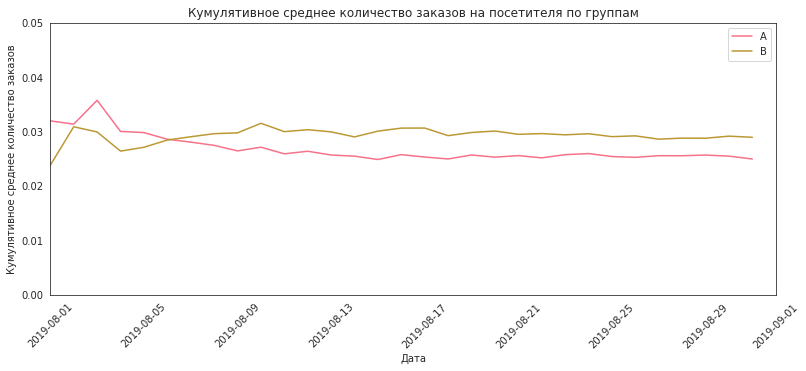

In [22]:
# считаем кумулятивную конверсию (она же кумулятивное среднее количество заказов)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize = (13, 5)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]) # Даты взяли из предыдущих графиков (для соответствия)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')

plt.show();

 В начале теста были колебания среднего количества заказов в обеих группах. График стабилизировался только к концу. Судя по всему сегмент В примерно с 9 августа стал стабильно лучше сегмента А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

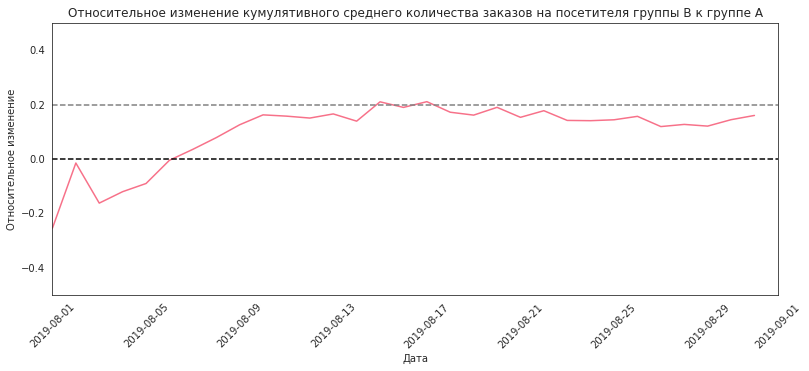

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.figure(figsize = (13, 5)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-8-1", '2019-9-1', -0.5, 0.5])
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.show();

Мы видим, что сегмент В лидировал по среднему количеству заказов (то есть по конверсии) практически с самого начала. Он достиг 20% положительной разницы против сегмента А на середине теста, затем стал немного снижаться и стабилизировался в конце. Данные по количеству заказов говорят о успехе сегмента В.

### Точечный график количества заказов по пользователям

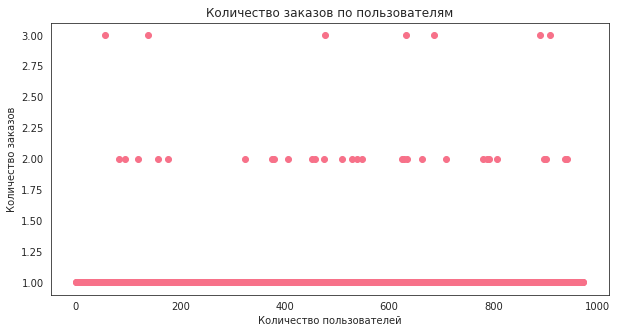

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize = (10, 5))
plt.scatter(x_values, ordersByUsers['orders'])  
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

plt.show();

Конечно большая часть пользователей делает менее двух заказов. Но тут видно достаточно много выбросов после 3 заказов.

### 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [25]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше, чем 1 заказ. И 1% - заказывали более двух раз. Здесь мы можем выбрать 2 заказа (сохраняя допустимый промежуток в 1%-5% отсеянных) на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Точечный график стоимостей заказов

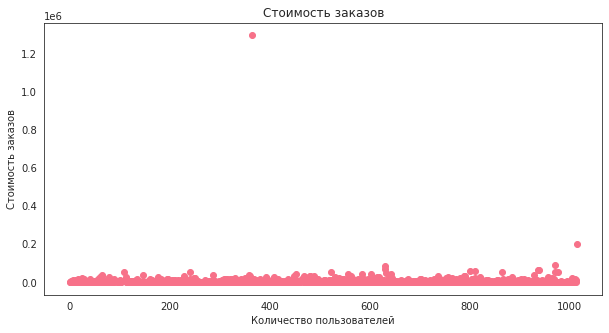

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize = (10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.show();

Видно, что основная часть людей заказывает меньше, чем на 20 000 рублей, но есть уникальный выброс в практически 1,3 млн рублей. Стоит просчитать перцентили. 

### 95-й и 99-й перцентили стоимости заказов. Выбор границу для определения аномальных заказов

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей совершали покупку по стоимости свыше 26785 рублей. И не более 1% пользователей - свыше 53904 рублей. 
Примем за аномальных пользователей тех, кто совершил заказ дороже 30 000 рублей. Так мы уберём от 1% до 5% пользователей с дорогими заказами. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

<div class="alert alert-block alert-info">
<b> </b> 
Гипотезы проверяются с помощью особого статистического критерия - Манна-Уитни (st.mannwhitneyu()). Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости. Уровень статистической значимости был взять за 0.05. Уровень значимости 0.05 означает, что при проведении статистического теста с нулевой гипотезой, существует 5% вероятность получить статистически значимый результат (т.е. отвергнуть нулевую гипотезу), даже если нулевая гипотеза верна. 
</div>

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("Статистическая значимость различий в среднем количестве заказов: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



Статистическая значимость различий в среднем количестве заказов: 0.011
Относительное различие: 0.160


По «сырым» данным в среднем числе заказов групп A и B присутствуют различия. Первое число 0.011 < 0.05 (уровень вероятности, который мы готовы принять в качестве критерия для отвержения нулевой гипотезы). Поэтому могли бы отвергнуть нулевую гипотезу (различий в среднем количестве заказов между группами нет). Относительный прирост среднего группы В к конверсии группы А равен 16% (то есть у нас случился положительный прирост). Но это с учетом аномалий, поэтому нельзя сказать сейчас, что это верный вывод, надо будет обязательно отфильтфровать данные для более точных результатов.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [29]:
print('Статистическая значимость различий в среднем чеке заказа: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


Статистическая значимость различий в среднем чеке заказа: 0.829
Относительное различие: 0.287


Статистическая значимость 0.829 намного больше 0.05 — это значит статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами практически 28.7% (то есть у группы B практически на 29% больше). Теперь посмотрим, как изменятся наши результаты после избавления от аномалий. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)



sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


print('Статистическая значимость различий в среднем чеке заказа по "очищенным" данным: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие по "очищенным" данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 





Статистическая значимость различий в среднем чеке заказа по "очищенным" данным: 0.013
Относительное различие по "очищенным" данным: 0.180


Особых различий после сокращения аномалий не обнаружилось. По "сырым" данным у нас получилась статистическая значимость 0.010 и относительное различие в 18.7%. После удаления выбросов статистическая значимость сократилась на 0.001, а относительное различие наоборот возросло на 2.7%. Значит все-таки действительно Сегмент В лучше сегмента А. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [31]:
print(
    'Статистическая значимость различий в среднем чеке заказа по "очищенным" данным: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие по "очищенным" данным: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


Статистическая значимость различий в среднем чеке заказа по "очищенным" данным: 0.829
Относительное различие по "очищенным" данным: -0.011


А здесь мы видим, что статистическая значимость в среднем чеке заказа у нас на том же уровне, что и с аномалиями, а относительное различие существенно сократилось: с 28.7% до -1.1%. Это означает, что без удаления выбросов сегмент B был намного лучше в среднем чеке по сравнению с сегменту А. А после сокращения аномалий сегмент В стал хуже сегмента А по результатам среднего чека на 1.1%.   

### Решение по результатам теста

<div class="alert alert-block alert-info">
    
**ИТОГ**
    
По завершению анализа мы можем сделать несколько выводов.
    
**По первой части проекта.**
    
Применив фреймворки мы выяснили, что самыми приоритетными гипотезами могут считаться следующие гипотезы: 
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" 
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Самыми неприоритетными гипотезами являются:
- "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
- "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"
    

**По второй части проекта.**

- Кумулятивная выручка по обеим группам растет, но у сегмента В выше, чем у сегмента А.
- По кумулятивному среднему чеку и относительному изменению данные сильно колеблись из-за наличия аномалий. 
- Сегмент B стал лидером по кумулятивному количеству заказов. Сначала данные колеблись, но уже с середины теста все стабилизировалось и показало четкую победу в этом вопросе сегмента В над сегментом А.
- Относительное изменение кумулятивного количества заказов подтвердило успех группы В. К середине теста изменение составляло +20%, далее стало немного снижаться, но в целом тенденция стабилизировалась.
- У количества заказов и среднего чека нашлись аномалии, от которых мы избавились в последствии. Не более 5% пользователей оформляли больше, чем 1 заказ. И 1% - заказывали более двух раз. Не более 5% пользователей совершали покупку по стоимости свыше 26785 рублей. И не более 1% пользователей - свыше 53904 рублей. 
- Есть статистически значимое различие по среднему количеству заказов между группами как по сырым данным, так и после фильтрации аномалий. Значит количество заказов увеличилось после внедрения теста. 
- По сырым и очищенным данным различия по среднему чеку не имеется, но до сокращения аномалий сегмент B был лучше сегмента А на 28.7%, а после удаления выбросов стал хуже на 1.1%. Это говорит о том, что средний чек практически не изменился по ходу теста. 

Таким образом, можно сделать вывод, что выручка увеличилась, и связано это с увеличением среднего количества заказов, а не со средним чеком. Можно остановить тест и зафиксировать победу группы В.

    
    
</div>